<a href="https://colab.research.google.com/github/MoneyMJ/Finance/blob/main/Daily_Ret_Port_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: Portfolio Optimization of a user with the help of efficient frontier. 

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
# Getting the tickers
#FAANG- acebook, Apple, Amazon, Netflix, Google
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [ ]:
#Assigning weights to the stocks
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
#Accesing the starting date of stock


In [ ]:
#Last date


In [ ]:
#Dataframe df for storing the closing values of the stock
import time
import datetime

df=pd.DataFrame()

for ticker in assets:
  period1 = int(time.mktime(datetime.datetime(2013, 1, 1, 00, 00).timetuple()))
  period2 = int(time.mktime(datetime.datetime(2021, 8, 7, 00, 00).timetuple()))
  interval = '1d' # 1d, 1m

  query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

  df1 = pd.read_csv(query_string)
  df['Date']=df1['Date']
  df[ticker]=df1['Adj Close']
  
df=df[['Date','FB','AMZN','AAPL','NFLX','GOOG']]
df=df.set_index('Date')
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.010899,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.796177,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.328323,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.232281,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.275965,13.880000,365.280823
...,...,...,...,...,...
2021-07-01,354.390015,3432.969971,137.270004,533.539978,2527.370117
2021-07-02,354.700012,3510.979980,139.960007,533.979980,2574.379883
2021-07-06,352.779999,3675.739990,142.020004,541.640015,2595.419922


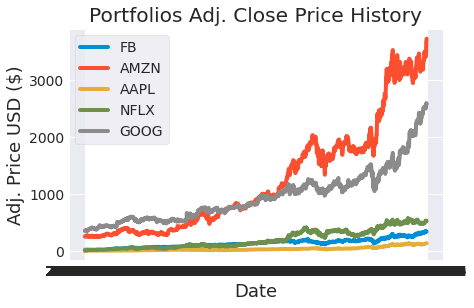

In [ ]:
#Visulaizing the stock portfolio
title='Portfolios Adj. Close Price History'

#Get the stocks
my_stocks=df

#Create & Plot the graph
sns.set_style('darkgrid')
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label=c)

plt.title(title)

plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()


In [ ]:
#Daily Simply Returns
returns= df.pct_change()
returns 

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-07-01,0.019211,-0.002090,0.002263,0.010091,0.008399
2021-07-02,0.000875,0.022724,0.019596,0.000825,0.018600
2021-07-06,-0.005413,0.046927,0.014718,0.014345,0.008173


In [ ]:
#Create & show annualized covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117091,0.054399,0.045063,0.056545,0.050286
AMZN,0.054399,0.091991,0.040090,0.062796,0.047110
AAPL,0.045063,0.040090,0.081346,0.035850,0.038569
NFLX,0.056545,0.062796,0.035850,0.206608,0.048792
GOOG,0.050286,0.047110,0.038569,0.048792,0.066085


In [ ]:
#portflio variance
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.060884681829856645

In [ ]:
#Portfolio Volatality aka Std
port_volatality=np.sqrt(port_variance)
port_volatality

0.24674821545424933

In [ ]:
#Annual Portfolio return
ann_ret=np.sum(returns.mean()*weights)*252
ann_ret

0.3609945394598304

In [ ]:
#Showing the expected annual return, volatality(risk), variance

percent_var=str(round(port_variance,2)*100)+' %'
percent_vol=str(round(port_volatality,2)*100)+' %'
percent_ret=str(round(ann_ret,2)*100)+' %'
print('Annual return '+percent_ret)
print('Annual volatality/risk '+percent_vol)
print('Annual Variance '+percent_var)


Annual return 36.0 %
Annual volatality/risk 25.0 %
Annual Variance 6.0 %


In [ ]:
pip install PyPortfolioOpt


     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 1.3MB 5.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736192 sha256=b20509069626ca41b5da2cb7e1e46e0eb0bb9c70e75da56b02557fcddab70f8a
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
#Portfolio Optimization

# calculating the expected returns and the annualised sample covariance matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Maximising the sharpe ratio
ef=EfficientFrontier(mu,S)
weights= ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.12801), ('AMZN', 0.32456), ('AAPL', 0.24752), ('NFLX', 0.29991), ('GOOG', 0.0)])
Expected annual return: 39.8%
Annual volatility: 26.6%
Sharpe Ratio: 1.42


(0.39782087837780256, 0.26623838190770466, 1.4191074768054275)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete Allocation: ',allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation:  {'FB': 6, 'AMZN': 1, 'AAPL': 26, 'NFLX': 9}
Funds Remaining: $693.61
